### 1./2. Kapitel Bearbeiten und Kennenlernen unseres Datensatzes. 

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score as score
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('balance-scale.csv')

In [4]:
print('Wir geben die ersten fünf Eniträge aus unserem Datensatz aus.')
print('Wir erkennen die Datei besitzt einen Header.')
df.head()

Wir geben die ersten fünf Eniträge aus unserem Datensatz aus.
Wir erkennen die Datei besitzt einen Header.


,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [5]:
print('Wir geben die drei beliebige Eniträge aus unserem Datensatz aus.')
df.sample(3)

Wir geben die drei beliebige Eniträge aus unserem Datensatz aus.


,Class,L-Weight,L-Distance,R-Weight,R-Distance
457,L,4,4,2,3
295,L,3,2,5,1
323,R,3,3,5,4


In [6]:
print('Wir geben die Datentypen aus den jeweiligen Spalten an.')
df.dtypes

Wir geben die Datentypen aus den jeweiligen Spalten an.


Class         object
L-Weight       int64
L-Distance     int64
R-Weight       int64
R-Distance     int64
dtype: object

In [7]:
print('Wir geben wichtige Kennzahlen in einer übersichtlichen Liste zu unserem Datensatz an.')
df.describe()

Wir geben wichtige Kennzahlen in einer übersichtlichen Liste zu unserem Datensatz an.


,L-Weight,L-Distance,R-Weight,R-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [8]:
print('Wir kontrollieren, ob die jeweiligen Attribute nahezu konstant sind oder primär NaN-Werte enthält.')
df.isna()
#data.fillna(value=0)
#data.dropna()
# Es gibt keine Zeilen in denen NaN vorkommt 

Wir kontrollieren, ob die jeweiligen Attribute nahezu konstant sind oder primär NaN-Werte enthält.


,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
620,False,False,False,False,False
621,False,False,False,False,False
622,False,False,False,False,False
623,False,False,False,False,False


Wir zählen die Anzahl an "Classen" aus unserem Datensatz und geben diese graphisch wieder.


<AxesSubplot:xlabel='Class', ylabel='count'>

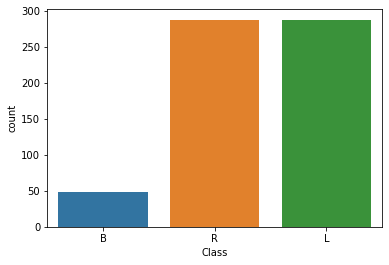

In [9]:
print('Wir zählen die Anzahl an "Classen" aus unserem Datensatz und geben diese graphisch wieder.')
sn.countplot(df['Class'])

### 3. Kapitel Korrelation und Muster innerhalb unseres Datensatzes

In [10]:
# Speichern aller Attribute in X und speichern aller Klassen in y. 
y = df[['Class']]
X = df.drop(['Class'],axis=1)
print(y.head())
print(X.head())

  Class
0     B
1     R
2     R
3     R
4     R
   L-Weight  L-Distance  R-Weight  R-Distance
0         1           1         1           1
1         1           1         1           2
2         1           1         1           3
3         1           1         1           4
4         1           1         1           5


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df['Class'] = LabelEncoder().fit_transform(df['Class'].tolist())

In [13]:
df.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


Darstellung der "Attributes" mittels einer Korrelationsmatrix


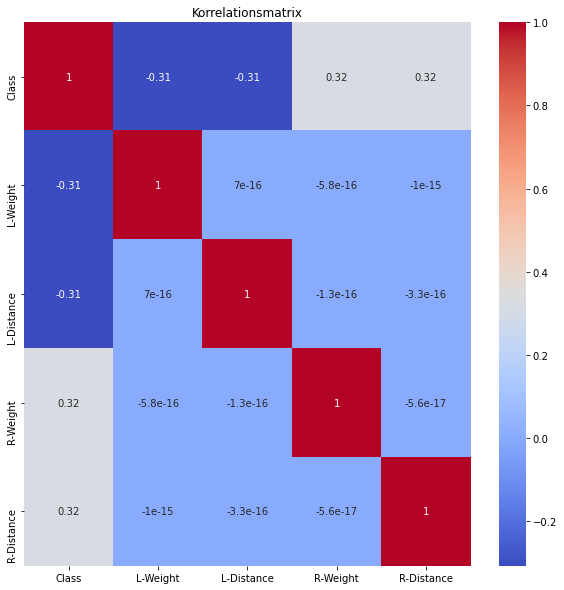

In [14]:
print('Darstellung der "Attributes" mittels einer Korrelationsmatrix')

plt.subplots(figsize=(10, 10))
sn.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Korrelationsmatrix')
plt.show()

Darstellung der "Attributes" mittels ScatterPlots und Histogrammen


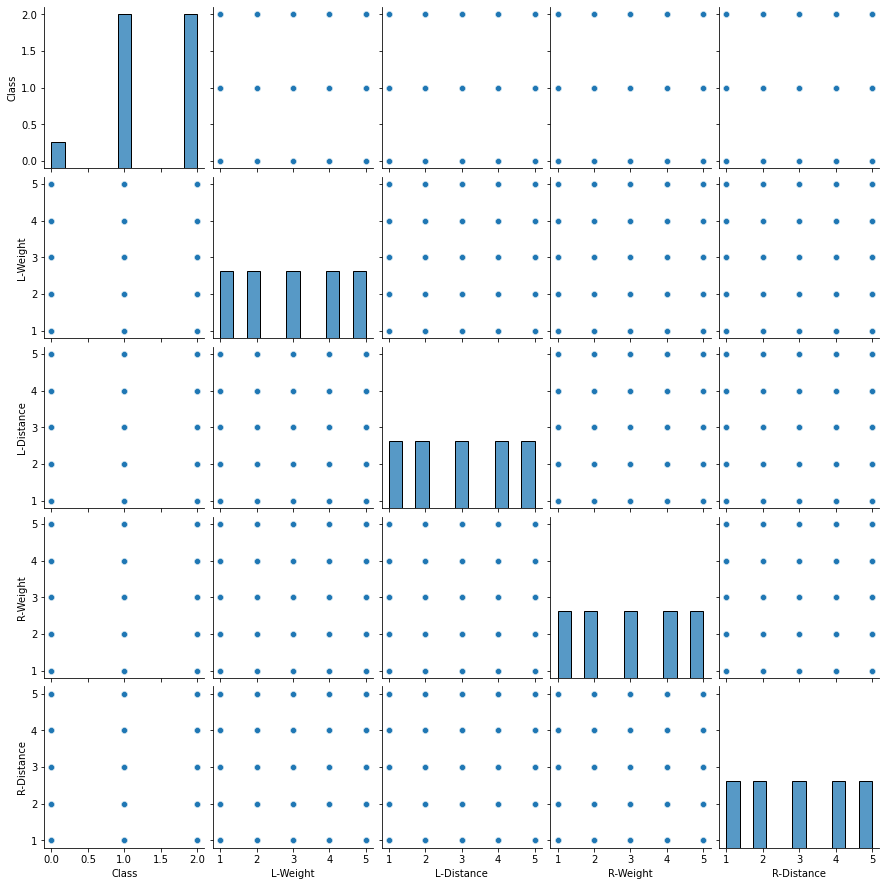

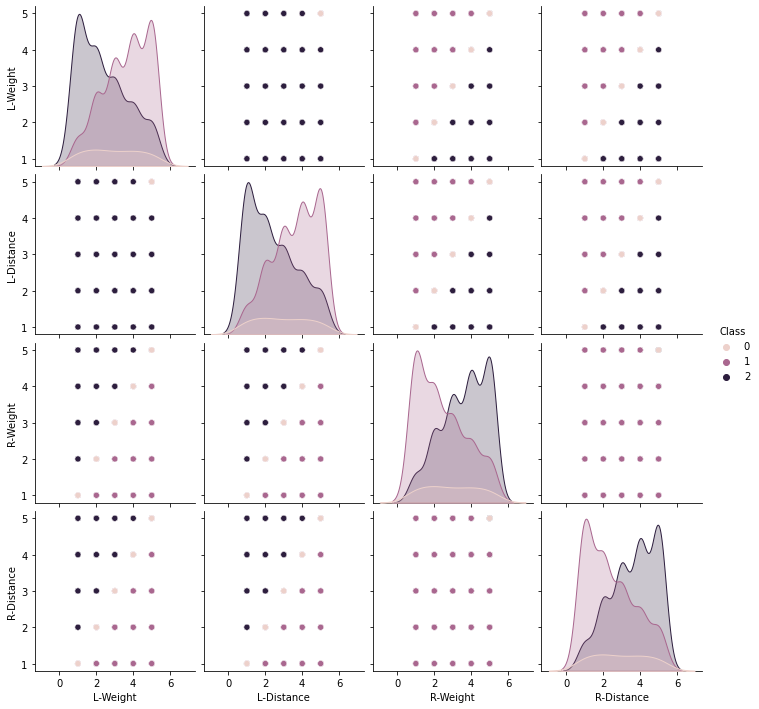

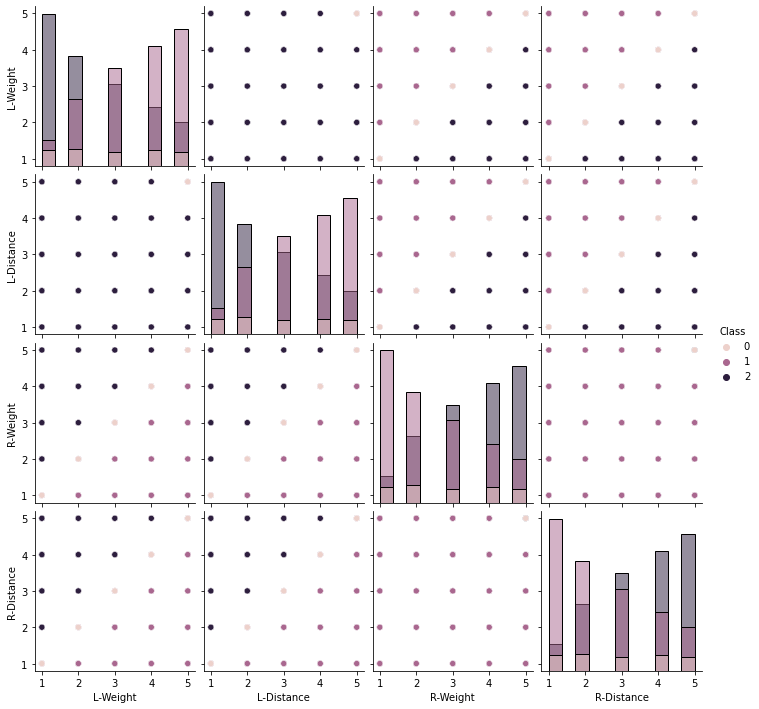

In [15]:
print('Darstellung der "Attributes" mittels ScatterPlots und Histogrammen')
sn.pairplot(df)
sn.pairplot(df, hue='Class')
sn.pairplot(df, hue='Class', diag_kind="hist")

## 4./5. und 6. Klassifizierung, Vergleich und Zusammenfassung der Ergebnisse: 

In [335]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size = 0.1)

In [336]:
#Hier bin ich alle Test- und Trainingsdatenpunkte einmal durchgegangen.
y_test

,Class
356,L
299,R
425,L
313,R
429,L
...,...
427,L
250,L
334,L
194,R


In [337]:
# Für unserer späteren Plot ( Aufgabe 6). 
results = []
names = []

### 1. Methode zur Klassifizierung unseres Datensatzes k-Nearst Neighbors

In [338]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15, weights = 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Unser Algorithmus macht folgende Annahme: ' + (str(y_pred)))
print('Die Genauigkeit unseres Algorithmus liegt bei: ' + str(score(y_pred, y_test)*100) + '%')
%time

results.append(score(y_pred,y_test))
names.append('kNN')
y_test.sample(5)

Unser Algorithmus macht folgende Annahme: ['L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L'
 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L'
 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'L']
Die Genauigkeit unseres Algorithmus liegt bei: 93.65079365079364%
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


,Class
235,L
613,L
200,L
452,L
548,R


              precision    recall  f1-score   support

           B       0.00      0.00      0.00         1
           L       0.97      0.95      0.96        38
           R       0.88      0.96      0.92        24

    accuracy                           0.94        63
   macro avg       0.62      0.64      0.63        63
weighted avg       0.92      0.94      0.93        63



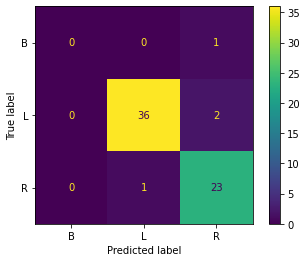

In [339]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(knn,X_test, y_test)
plt.savefig('knn_conf_matrix.png')
plt.show()

### 2. Methode zur Klassifizierung unseres Datensatzes Entscheidungsbäume

In [340]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best')
tree.fit(X_train,y_train)
y_predi = tree.predict(X_test)
print('Unser Algorithmus macht folgende Annahme: ' + (str(y_predi)))
print('Die Genauigkeit unseres Algorithmus liegt bei: ' + str(score(y_predi, y_test)*100) + '%')
%time
results.append(score(y_predi,y_test))
names.append('tree')

Unser Algorithmus macht folgende Annahme: ['L' 'R' 'L' 'B' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'B' 'L' 'B' 'B' 'L'
 'L' 'L' 'L' 'R' 'R' 'B' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'B' 'L' 'R' 'L'
 'L' 'L' 'R' 'B' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'L'
 'B' 'B' 'R' 'L' 'L' 'L' 'L' 'R' 'L']
Die Genauigkeit unseres Algorithmus liegt bei: 80.95238095238095%
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


              precision    recall  f1-score   support

           B       0.00      0.00      0.00         1
           L       0.97      0.84      0.90        38
           R       0.90      0.79      0.84        24

    accuracy                           0.81        63
   macro avg       0.62      0.54      0.58        63
weighted avg       0.93      0.81      0.87        63



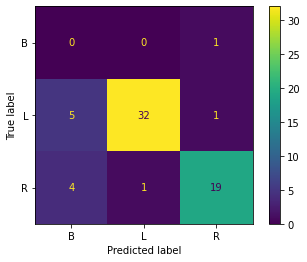

In [341]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predi))
conf_mat = confusion_matrix(y_test, y_predi)
plot_confusion_matrix(tree,X_test, y_test)
plt.savefig('tree_conf_matrix.png')
plt.show()

### 3. Methode zur Klassifizerung unseres Datensatzes Logistische Regression

In [342]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = 'l2')
logreg.fit(X_train,y_train)
y_predic = logreg.predict(X_test)
print('Unser Algorithmus macht folgende Annahme: ' + (str(y_predic))) 
print('Die Genauigkeit unseres Algorithmus liegt bei: ' + str(score(y_predic, y_test)*100) + '%')
%time
results.append(score(y_predic,y_test))
names.append('logreg')

Unser Algorithmus macht folgende Annahme: ['L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L'
 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L'
 'R' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L']
Die Genauigkeit unseres Algorithmus liegt bei: 90.47619047619048%
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


              precision    recall  f1-score   support

           B       0.00      0.00      0.00         1
           L       0.95      0.92      0.93        38
           R       0.85      0.92      0.88        24

    accuracy                           0.90        63
   macro avg       0.60      0.61      0.60        63
weighted avg       0.89      0.90      0.90        63



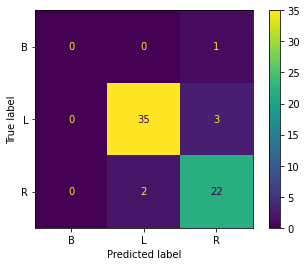

In [343]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predic))
conf_mat = confusion_matrix(y_test, y_predic)
plot_confusion_matrix(logreg,X_test, y_test)
plt.savefig('logreg_conf_matrix.png')
plt.show()

### 4. Methode zur Klassifizierung unseres Datensatzes Support Vector Machine

In [344]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(X_train,y_train)
y_predict = svm.predict(X_test)
print('Unser Algorithmus macht folgende Annahme: ' + (str(y_predict))) 
print('Die Genauigkeit unseres Algorithmus liegt bei: ' + str(score(y_predict, y_test)*100) + '%')
%time
results.append(score(y_predict,y_test))
names.append('svm')

Unser Algorithmus macht folgende Annahme: ['L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'L'
 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'R' 'L']
Die Genauigkeit unseres Algorithmus liegt bei: 95.23809523809523%
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 5.01 µs


              precision    recall  f1-score   support

           B       0.00      0.00      0.00         1
           L       0.97      0.97      0.97        38
           R       0.92      0.96      0.94        24

    accuracy                           0.95        63
   macro avg       0.63      0.64      0.64        63
weighted avg       0.94      0.95      0.94        63



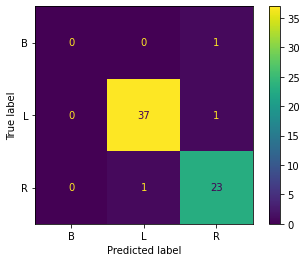

In [345]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predict))
conf_mat = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(svm,X_test, y_test)
plt.grid(False)
plt.savefig('svm_conf_matrix.png')
plt.show()

In [367]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Support vector Machine')
print('Die Genauigkeit des Algorithmus für die Trainingsdaten liegt bei ' + str(svm.score(X_train, y_train) * 100) + '%')
print('Die Genauigkeit des Algorithmus für die Testdaten liegt bei ' + str(svm.score(X_test, y_test) * 100) + '%')
print()

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('Logistische Regression')
print('Die Genauigkeit des Algorithmus für die Trainingsdaten liegt bei ' + str(logreg.score(X_train, y_train) * 100) + '%')
print('Die Genauigkeit des Algorithmus für die Testdaten liegt bei ' + str(logreg.score(X_test, y_test) * 100) + '%')
print()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print('Entscheidungsbäume:')
print('Die Genauigkeit des Algorithmus für die Trainingsdaten liegt bei ' + str(tree.score(X_train, y_train) * 100) + '%')
print('Die Genauigkeit des Algorithmus für die Testdaten liegt bei ' + str(tree.score(X_test, y_test) * 100) + '%')
print()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print('kNN-Algorithmus: ')
print('Die Genauigkeit des Algorithmus für die Trainingsdaten liegt bei ' + str(knn.score(X_test,y_test) * 100) + '%')
print('Die Genauigkeit des Algorithmus für die Testdaten liegt bei ' + str(knn.score(X_train,y_train) * 100) + '%')  

Support vector Machine
Die Genauigkeit des Algorithmus für die Trainingsdaten liegt bei 90.74733096085409%
Die Genauigkeit des Algorithmus für die Testdaten liegt bei 95.23809523809523%

Logistische Regression
Die Genauigkeit des Algorithmus für die Trainingsdaten liegt bei 89.32384341637011%
Die Genauigkeit des Algorithmus für die Testdaten liegt bei 90.47619047619048%

Entscheidungsbäume:
Die Genauigkeit des Algorithmus für die Trainingsdaten liegt bei 100.0%
Die Genauigkeit des Algorithmus für die Testdaten liegt bei 79.36507936507937%

kNN-Algorithmus: 
Die Genauigkeit des Algorithmus für die Trainingsdaten liegt bei 80.95238095238095%
Die Genauigkeit des Algorithmus für die Testdaten liegt bei 86.12099644128114%


### 6. Zusammenfassen aller meiner Algorithmen in einem Dokument

In [347]:
names

['kNN', 'tree', 'logreg', 'svm']

In [348]:
results

[0.9365079365079365,
 0.8095238095238095,
 0.9047619047619048,
 0.9523809523809523]

In [349]:
results = [i * 100 for i in results]

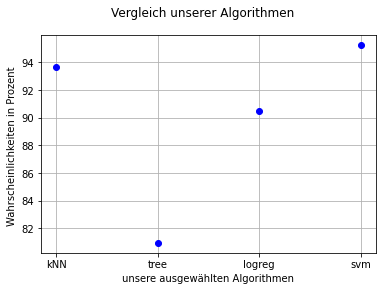

In [350]:
fig = plt.figure()
fig.suptitle('Vergleich unserer Algorithmen')
plt.plot(names,results,'bo')
plt.xlabel('unsere ausgewählten Algorithmen') 
plt.ylabel('Wahrscheinlichkeiten in Prozent ')
plt.grid(True)
plt.savefig('vergleich_unserer_algorithmen.png')
plt.show()